In [1]:
import pandas as pd
import os

In [2]:
def parseErrFile(path):
    sim_names = []
    sim_errors = []
    with open(path, "r") as f:
        for line in f:
            aux = line.split()
            if len(aux)>=7:
                if "_" in aux[0]:
                    if aux[-1]!='nan':
                        sim_names.append(aux[0])
                        sim_errors.append(aux[-1])
    return sim_names, sim_errors

def makedf(sim_names, sim_errors):
    d = {"file_name": sim_names, "error": pd.to_numeric(sim_errors)}
    return pd.DataFrame(data=d)

In [80]:
dir_path = '/home/nvme/Opt/outputs/20240723_zeng_onebyone_bec1.opp'
dirs = os.listdir(dir_path)

#Ez a driveról letöltötthöz jó
#for d in dirs:
#    if ".opp" in d:
#       sim_names, sim_errors = parseErrFile(dir_path+'/'+d+'/errfValues')
#       df = makedf(sim_names, sim_errors)
#
#       minErr = df.iloc[df['error'].idxmin()].to_frame().T
#       minErr.to_csv("testing.csv", mode='a', index=False, header=False)
#
#       print(df.iloc[df['error'].idxmin()])
for d in dirs:
    if d=='errfValues':
       sim_names, sim_errors = parseErrFile(dir_path+'/'+d)
       df = makedf(sim_names, sim_errors)

       minErr = df.iloc[df['error'].idxmin()].to_frame().T
       minErr.to_csv("testing.csv", mode='a', index=False, header=False)

       print(df.iloc[df['error'].idxmin()])



file_name    zeng2012_48h_3893
error                 1.457707
Name: 3776, dtype: object


In [81]:
plot_dir=dir_path+'/plots/plotData.txt'
#df_list = list()
# holczer20019 mindegyik best fit 10000 sampleből, külön-külön
# ulk=4153, mtor=6235, ampk=8795 ----> ez big rip, aut=5011 -----> big rip
# zeng ugyan ugy mint holczer
# casp=6366 aut=9572 bax=5951 bec1=3893
with open(plot_dir, 'r') as f:
    lines = f.readlines()
    cols = ["XML", "species", "point", "t / s", "exp.val.", "errorbar_low", "errorbar_high", "mech20240619"]
    l = 0
    while l in range(len(lines)):
        if '_3893_' in lines[l]:
            df = pd.DataFrame(columns=cols)
            for i in range(2,8):
                data = lines[l+i].split()
                df.loc[len(df)] = data
            df_list.append(df)
        l+=10
            

In [82]:
df_list

[                 XML   species point        t / s     exp.val. errorbar_low  \
 0  zeng2012_48h_6366  CASPASEA     1  0.00000E+00  2.04410E-13  3.05928E-13   
 1  zeng2012_48h_6366  CASPASEA     2  1.29600E+06  5.34340E-13  7.90880E-13   
 2  zeng2012_48h_6366  CASPASEA     3  2.59200E+06  6.70150E-13  8.08708E-13   
 3  zeng2012_48h_6366  CASPASEA     4  3.88800E+06  7.07190E-13  8.70442E-13   
 4  zeng2012_48h_6366  CASPASEA     5  5.18400E+06  1.28470E-12  1.42326E-12   
 5  zeng2012_48h_6366  CASPASEA     6  1.03680E+07  1.69900E-12  1.90890E-12   
 
   errorbar_high mech20240619  
 0   1.02892E-13  1.02204E-13  
 1   2.77800E-13  8.29975E-13  
 2   5.31592E-13  8.29975E-13  
 3   5.43938E-13  8.29975E-13  
 4   1.14614E-12  8.29975E-13  
 5   1.48910E-12  8.29975E-13  ,
                  XML species point        t / s     exp.val. errorbar_low  \
 0  zeng2012_48h_9572     AUT     1  0.00000E+00  1.13250E-14  3.59850E-14   
 1  zeng2012_48h_9572     AUT     2  1.29600E+06  2.40030

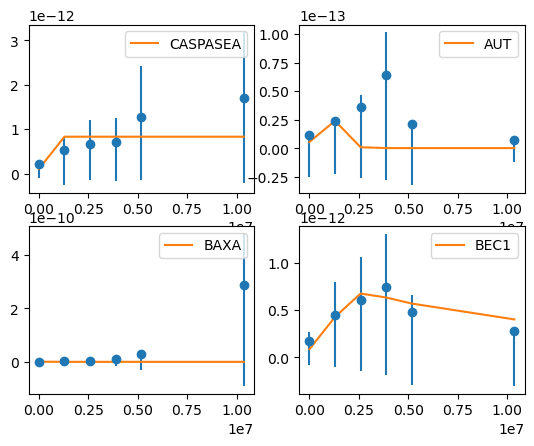

In [83]:
import matplotlib.pyplot as plt
import numpy as np

n_rows = 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols)
for i, df in enumerate(df_list):
    ax = axes[i // n_cols, i % n_cols]

    test = df 
    fig_name = test.species[0]

    data_points = test['exp.val.'].astype(float)
    errorbar_high = test['errorbar_high'].astype(float)
    errorbar_low = test['errorbar_low'].astype(float)
    t = test['t / s'].astype(float)
    sim = test['mech20240619'].astype(float)
    errorbar_high[errorbar_high < 0] = 0
    errorbar_low[errorbar_low < 0] = 0
    ax.errorbar(t, data_points, yerr=[errorbar_low,errorbar_high], fmt='o')
    ax.plot(t,sim, label = fig_name)
    ax.legend()